### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '../../data/'
df = pd.read_csv(path + 'marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [343]:
df.info(), df.select_dtypes(include='object').nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(None,
 Education           5
 Marital_Status      8
 Dt_Customer       663
 dtype: int64)

In [344]:
df.isna().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

(count      2216.000000
 mean      52247.251354
 std       25173.076661
 min        1730.000000
 25%       35303.000000
 50%       51381.500000
 75%       68522.000000
 max      666666.000000
 Name: Income, dtype: float64,
 <Axes: >)

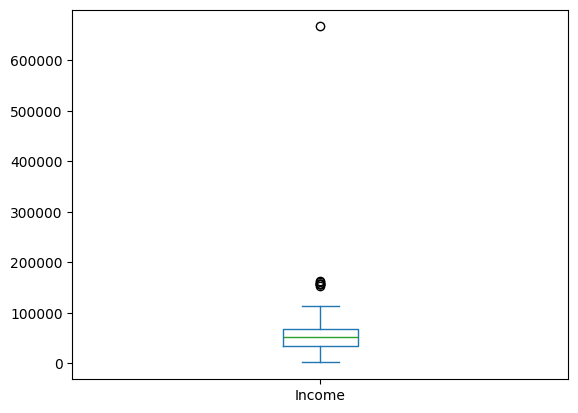

In [345]:
df.Income.describe(), df.Income.plot(kind = "box")

In [346]:
df['Income_nan_flag'] = df['Income'].isna().astype(int)
df['Income'].fillna(0, inplace=True)

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

(Register_month
 8     222
 5     216
 10    212
 3     211
 1     197
 9     193
 11    187
 4     182
 2     178
 12    175
 6     166
 7     101
 Name: count, dtype: int64,
 count    2240.000000
 mean      353.582143
 std       202.122512
 min         0.000000
 25%       180.750000
 50%       355.500000
 75%       529.000000
 max       699.000000
 Name: Days_Customer, dtype: float64,
 <Axes: >)

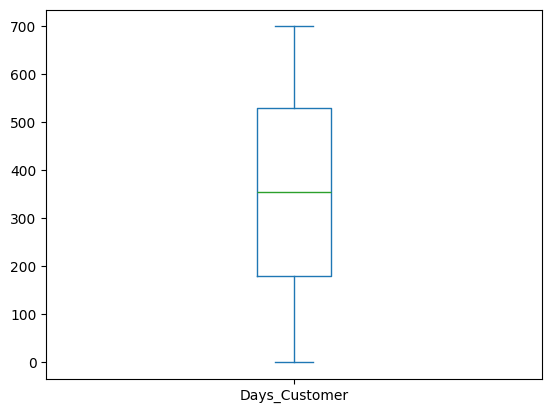

In [347]:
# how many days client has been a customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Days_Customer'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df['Register_month'] = df['Dt_Customer'].dt.month

df['Register_month'].value_counts(), df['Days_Customer'].describe(), df['Days_Customer'].plot(kind = "box")

(       Age_by_today  Age_by_registration
 count   2240.000000          2240.000000
 mean      45.194196            44.222321
 std       11.984069            12.022855
 min       18.000000            16.000000
 25%       37.000000            36.000000
 50%       44.000000            43.000000
 75%       55.000000            54.000000
 max      121.000000           121.000000,
 <Axes: >)

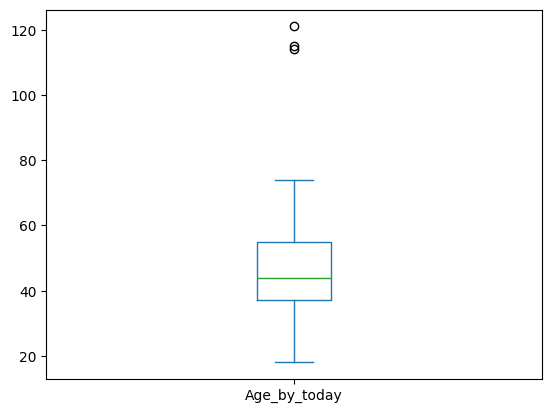

In [348]:
# how old the client based on Year Birth
today_year = df['Dt_Customer'].dt.year.max()
df['Age_by_today'] = (today_year - df['Year_Birth'])

# age by the registration day
df['Age_by_registration'] = df['Dt_Customer'].dt.year - df['Year_Birth']

df[['Age_by_today','Age_by_registration']].describe(), df['Age_by_today'].plot(kind = "box")

In [349]:
old_clients = df[df['Age_by_today'] > 100]
print(old_clients[['ID', 'Dt_Customer', 'Year_Birth']].head(10))
old_clients[['Age_by_registration', 'Age_by_today']]

        ID Dt_Customer  Year_Birth
192   7829  2013-09-26        1900
239  11004  2014-05-17        1893
339   1150  2013-09-26        1899


,Age_by_registration,Age_by_today
192,113,114
239,121,121
339,114,115


In [350]:
df['Education'].value_counts(), df['Marital_Status'].value_counts(), 

(Education
 Graduation    1127
 PhD            486
 Master         370
 2n Cycle       203
 Basic           54
 Name: count, dtype: int64,
 Marital_Status
 Married     864
 Together    580
 Single      480
 Divorced    232
 Widow        77
 Alone         3
 Absurd        2
 YOLO          2
 Name: count, dtype: int64)

In [351]:
from sklearn.preprocessing import OneHotEncoder

maper = {'YOLO': 'Other', 'Absurd': 'Other', 'Alone': 'Single'}
df['Marital_Status'] = df['Marital_Status'].replace(maper)

ohe = OneHotEncoder(sparse_output=False)

ohe.fit(df[['Education', 'Marital_Status']])
ohe.categories_
ohe_df = pd.DataFrame(ohe.transform(df[['Education', 'Marital_Status']]), columns=ohe.get_feature_names_out(['Education', 'Marital_Status']))
ohe_df.head()

df = pd.concat([df, ohe_df], axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Year_Birth               2240 non-null   int64         
 2   Education                2240 non-null   object        
 3   Marital_Status           2240 non-null   object        
 4   Income                   2240 non-null   float64       
 5   Kidhome                  2240 non-null   int64         
 6   Teenhome                 2240 non-null   int64         
 7   Dt_Customer              2240 non-null   datetime64[ns]
 8   Recency                  2240 non-null   int64         
 9   MntWines                 2240 non-null   int64         
 10  MntFruits                2240 non-null   int64         
 11  MntMeatProducts          2240 non-null   int64         
 12  MntFishProducts          2240 non-

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [353]:
X = df.drop(columns=['ID', 'Dt_Customer', 'Year_Birth', 'Education', 'Marital_Status'])

In [354]:
df_metrics = pd.DataFrame(columns=['model', 'value'])

In [355]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def k_mean_clustering(X, n_clusters, type='kmeans'): 

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    pred = kmeans.predict(X)
    metric = silhouette_score(X, pred)
    print(f'Silhouette score for {n_clusters} clusters: {metric:.4f}')

    new_row = pd.DataFrame({'model': [type], 'value': [metric]})

    return kmeans.labels_, new_row

In [356]:

kmeans_labels_3, metric_3 = k_mean_clustering(X, 3, '3 clusters')
df_metrics = pd.concat([df_metrics, metric_3], ignore_index=True)
df_metrics


# kmeans_3 = KMeans(n_clusters=3, random_state=42)
# kmeans_3.fit(X)

# labels_3 = kmeans_3.predict(X)

# metric_3 = silhouette_score(X, labels_3)
# print(f'Silhouette score for 3 clusters: {metric_3:.3f}')

# new_row = pd.DataFrame([{'model': 'kmeans_3', 'value': metric_3}])



Silhouette score for 3 clusters: 0.5282


C:\Users\Olhas\AppData\Local\Temp\ipykernel_35056\3899170200.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metrics = pd.concat([df_metrics, metric_3], ignore_index=True)


,model,value
0,3 clusters,0.528192


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [357]:
# !pip install plotly --quiet

In [358]:
# import plotly.express as px

# px.scatter_3d(df, x='Income', y='Age_by_today', z='Days_Customer', color=labels_3, title='3 Clusters KMeans', color_continuous_scale=px.colors.sequential.Viridis).show()

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [359]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled, metric_scaled = k_mean_clustering(X_scaled, 3, 'StandartScaler')
df_metrics = pd.concat([df_metrics, metric_scaled], ignore_index=True)

# kmeans_stand = KMeans(n_clusters=3, random_state=42)
# kmeans_stand.fit(X_scaled)
# labels_stand = kmeans_stand.predict(X_scaled)
# metric_stand = silhouette_score(X_scaled, labels_stand)
# print(f'Silhouette score for 3 clusters with StandardScaler: {metric_stand:.3f}')

minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)

kmeans_minmax, metric_minmax = k_mean_clustering(X_minmax, 3, 'MinMaxScaler')
df_metrics = pd.concat([df_metrics, metric_minmax], ignore_index=True)

# kmeans_minmax = KMeans(n_clusters=3, random_state=42)
# kmeans_minmax.fit(X_minmax)
# labels_minmax = kmeans_minmax.predict(X_minmax)
# metric_minmax = silhouette_score(X_minmax, labels_minmax)
# print(f'Silhouette score for 3 clusters with MinMaxScaler: {metric_minmax:.3f}')


Silhouette score for 3 clusters: 0.0974
Silhouette score for 3 clusters: 0.1705


**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [360]:
X_clean = X.copy()

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

             SSD          diff  normalize_diff
2   7.028639e+11           NaN             NaN
3   5.484217e+11 -1.544422e+11        0.554935
4   2.016744e+11 -3.467473e+11        0.000000
5   1.547537e+11 -4.692063e+10        0.865211
6   9.255855e+10 -6.219519e+10        0.821133
7   6.270802e+10 -2.985053e+10        0.914470
8   4.764416e+10 -1.506386e+10        0.957140
9   3.687099e+10 -1.077318e+10        0.969521
10  2.683896e+10 -1.003202e+10        0.971660
11  2.167175e+10 -5.167217e+09        0.985699


Text(0.5, 1.0, 'Elbow Method')

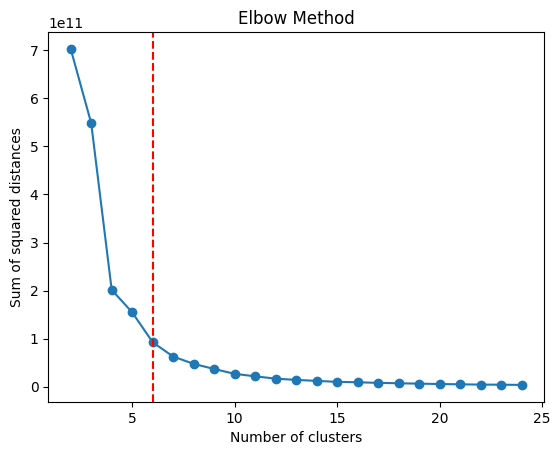

In [361]:
K_point = range(2, 25)
SSD = []

for k in K_point:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    SSD.append(kmeans.inertia_)

sdd = pd.DataFrame(SSD, index=K_point, columns=['SSD'])
sdd['diff'] = sdd.SSD.diff()
sdd['normalize_diff'] = (sdd['diff']-sdd['diff'].min()) / (sdd['diff'].max()-sdd['diff'].min()) 
print(sdd.head(10))

plt.plot(K_point, SSD, marker='o')
plt.axvline(x=6, color='red', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')  

In [362]:
# kmeans_6 = KMeans(n_clusters=6, random_state=42)
# kmeans_6.fit(X)
# labels_6 = kmeans_6.predict(X)
# metric_6 = silhouette_score(X, labels_6)
# print(f'Silhouette score for 6 clusters: {metric_6:.3f}')

kmeans_labels_6, metric_6 = k_mean_clustering(X, 6, '6 clusters')
df_metrics = pd.concat([df_metrics, metric_6], ignore_index=True)
df_metrics


Silhouette score for 6 clusters: 0.5341


,model,value
0,3 clusters,0.528192
1,StandartScaler,0.097405
2,MinMaxScaler,0.170471
3,6 clusters,0.534077


Text(0.5, 1.0, 'Elbow Method')

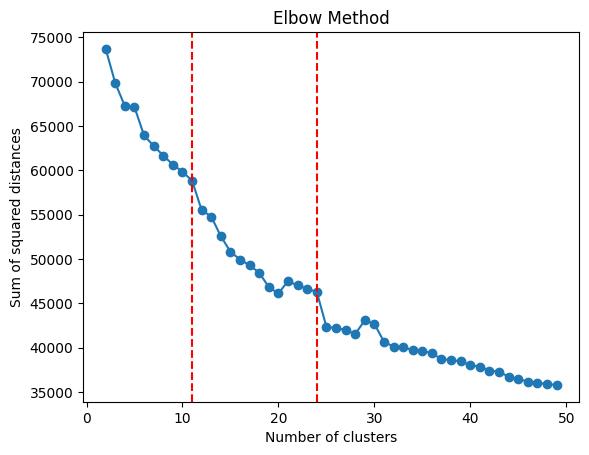

In [363]:
K_point = range(2, 50)
SSD = []

for k in K_point:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    SSD.append(kmeans.inertia_)

plt.plot(K_point, SSD, marker='o')
plt.axvline(x=11, color='red', linestyle='--')
plt.axvline(x=24, color='red', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method')    

In [364]:
# kmeans_25 = KMeans(n_clusters=24, random_state=42)
# kmeans_25.fit(X_scaled)
# labels_25 = kmeans_25.predict(X_scaled)
# metric_25 = silhouette_score(X_scaled, labels_25)
# print(f'Silhouette score for 24 clusters: {metric_25:.3f}')

# kmeans_12 = KMeans(n_clusters=11, random_state=42)
# kmeans_12.fit(X_scaled)
# labels_12 = kmeans_12.predict(X_scaled)
# metric_12 = silhouette_score(X_scaled, labels_12)
# print(f'Silhouette score for 11 clusters: {metric_12:.3f}')

kmeans_labels_24, metric_24 = k_mean_clustering(X_scaled, 24, '24 clusters standard')
df_metrics = pd.concat([df_metrics, metric_24], ignore_index=True)
kmeans_labels_11, metric_11 = k_mean_clustering(X_scaled, 11, '11 clusters standard')
df_metrics = pd.concat([df_metrics, metric_11], ignore_index=True)




Silhouette score for 24 clusters: 0.0798
Silhouette score for 11 clusters: 0.0687


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [365]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

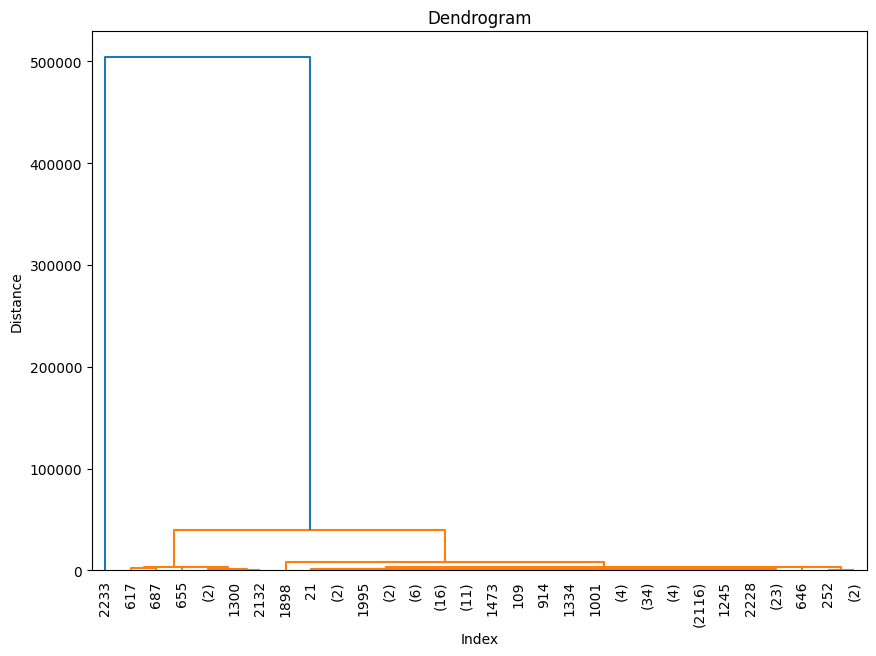

In [366]:

single_link = linkage(X_clean, method='single')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dendrogram(single_link, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [367]:
labels_hier_2 = fcluster(single_link, t=2, criterion='maxclust')
metric_hier_2 = silhouette_score(X, labels_hier_2)
print(f'Silhouette score for 2 clusters: {metric_hier_2:.3f}')

new_row = pd.DataFrame([{'model': 'hierarchical_2', 'value': metric_hier_2}])
df_metrics = pd.concat([df_metrics, new_row], ignore_index=True)

labels_hier_3 = fcluster(single_link, t=3, criterion='maxclust')
metric_hier_3 = silhouette_score(X, labels_hier_3)
print(f'Silhouette score for 3 clusters: {metric_hier_3:.3f}')

new_row = pd.DataFrame([{'model': 'hierarchical_3', 'value': metric_hier_3}])
df_metrics = pd.concat([df_metrics, new_row], ignore_index=True)

Silhouette score for 2 clusters: 0.959
Silhouette score for 3 clusters: 0.760


In [368]:
df_metrics.sort_values(by='value', ascending=True, inplace=True)
df_metrics

,model,value
5,11 clusters standard,0.068717
4,24 clusters standard,0.079826
1,StandartScaler,0.097405
2,MinMaxScaler,0.170471
0,3 clusters,0.528192
3,6 clusters,0.534077
7,hierarchical_3,0.759768
6,hierarchical_2,0.958921


**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?